<a href="https://colab.research.google.com/github/sugi-san/StyleGAN-Human/blob/main/stylegan_human.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

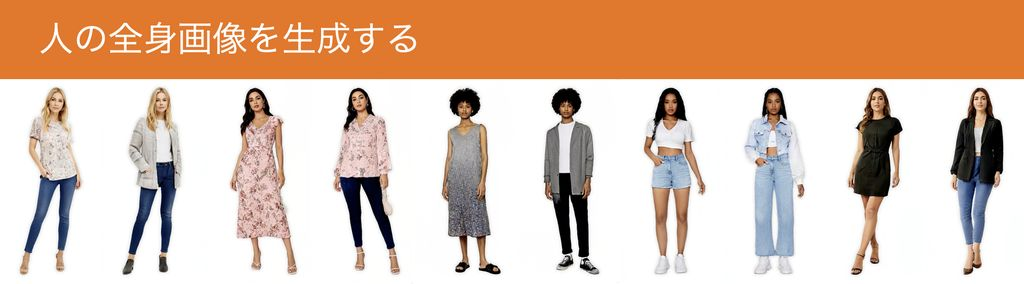

In [ ]:
#@title **1.セットアップ**

# check gpu spec
! nvidia-smi -L

# get code from github
! git clone https://github.com/sugi-san/StyleGAN-Human.git
%cd StyleGAN-Human

# install ninja
! wget https://github.com/ninja-build/ninja/releases/download/v1.8.2/ninja-linux.zip
! sudo unzip ninja-linux.zip -d /usr/local/bin/
! sudo update-alternatives --install /usr/bin/ninja ninja /usr/local/bin/ninja 1 --force 

# install library
! pip install lpips
! pip install --upgrade gdown

# select tensorflow_version
%tensorflow_version 1.x 

# download pretrained models
! mkdir pretrained_models
import gdown
gdown.download('https://drive.google.com/uc?id=1FlAb1rYa0r_--Zj_ML8e6shmaF28hQb5', 'pretrained_models/stylegan2_1024.pkl', quiet=False)
gdown.download('https://drive.google.com/uc?id=125OG7SMkXI-Kf2aqiwLLHyCvSW-gZk3M', 'pretrained_models/ffhq.pkl', quiet=False)
gdown.download('https://drive.google.com/uc?id=1MduBgju5KFNrQfDLoQXJ_1_h5MnctCIG', 'pretrained_models/mmod_human_face_detector.dat', quiet=False)
gdown.download('https://drive.google.com/uc?id=1A82DnJBJzt8wI2J8ZrCK5fgHcQ2-tcWM', 'pretrained_models/shape_predictor_68_face_landmarks.dat', quiet=False)

# define function
from function import *

# make dirctory
! mkdir download


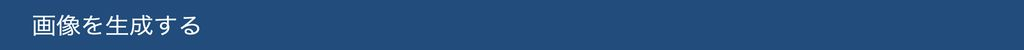

In [ ]:
#@title **2.画像の生成**

#@markdown ・seedsにカンマ区切りで数字を記入（max50個）
reset_folder('outputs/stylegan2_1024')
seeds = "9,13,18,53,97" #@param {type:"string"}

! python generate.py --outdir=outputs/stylegan2_1024/\
                     --seeds=$seeds\
                     --trunc=0.7\
                     --network=pretrained_models/stylegan2_1024.pkl\
                     --version 2

# display_pic 
display_pic('outputs/stylegan2_1024')

In [ ]:
#@title **3.動画の作成**

#@markdown ・seedsにカンマ区切りで２つの数字を記入
reset_folder('outputs/inter_gifs')
seeds = "9,13" #@param {type:"string"}

! python interpolation.py --network=pretrained_models/stylegan2_1024.pkl\
                          --seeds=$seeds\
                          --outdir=outputs/inter_gifs

# gif2mp4
! ffmpeg -y -i outputs/inter_gifs/latent_space_traversal.gif -pix_fmt yuv420p -loglevel error outputs/inter_gifs/inter.mp4

# display_mp4
display_mp4('outputs/inter_gifs/inter.mp4')

In [ ]:
#@title **4.動画のダウンロード**
import shutil
download_path = 'download/'+seeds+'.mp4'
shutil.copy('outputs/inter_gifs/inter.mp4', download_path)

from google.colab import files
files.download(download_path)

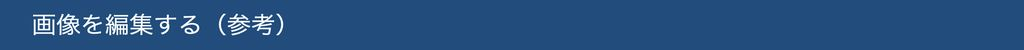

In [ ]:
#@title **5.長さ調整**

#@markdown ・プリセットされたseedsから選択
reset_folder('outputs/editing')
attr_name = 'upper_length' 
seeds =  921 #@param [265, 566, 837, 921]{type:"raw"}

! python edit2.py --outdir outputs/editing\
                 --network pretrained_models/stylegan2_1024.pkl\
                 --attr_name $attr_name\
                 --seeds $seeds

# display mp4
video_path = 'outputs/editing/video/'+attr_name+'_'+str(seeds).zfill(5)+'.mp4'
display_mp4_s(video_path) 

In [ ]:
#@title **6.バリエーション**

#@markdown ・プリセットされたseedsから選択
reset_folder('outputs/editing')
attr_name = 'upper_length' 
seeds =  28#@param [28, 64, 57, 67, 248]{type:"raw"}

! python edit2.py --outdir outputs/editing\
                 --network pretrained_models/stylegan2_1024.pkl\
                 --attr_name $attr_name\
                 --seeds $seeds

# display mp4
video_path = 'outputs/editing/video/'+attr_name+'_'+str(seeds).zfill(5)+'.mp4'
display_mp4_s(video_path) 

###【備考】
・ブラウザは、必ずGoogle Chromeを使用して下さい。

・動作がおかしくなった場合の対応\
１）グーグルクロームの該当タブを削除して接続を切る\
２）再度リンクを開く\
３）右上にある「ランタイム／ランタイムを出荷時設定にリセット」をクリックする（下記写真を参照に下さい）\
４）あとは、動画にある通りの操作をすればOK

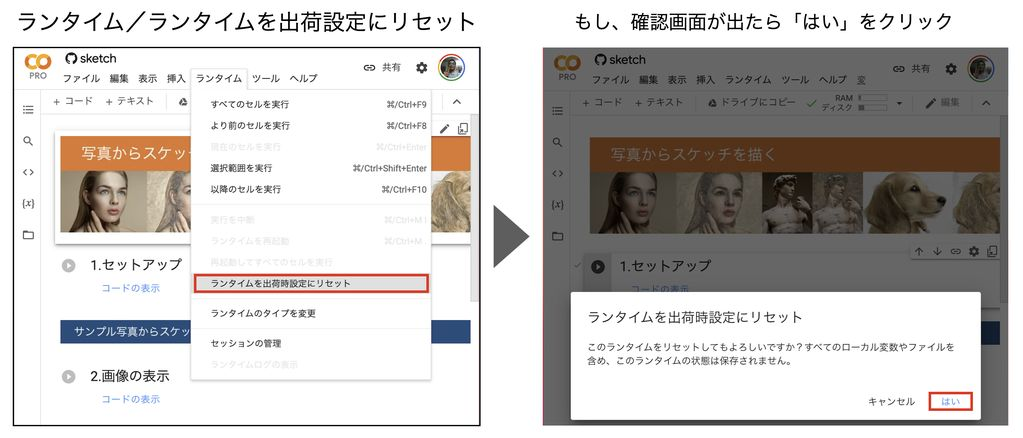